# Nonlinear programming

## Scalar (one-variable)

Using `scipy.optimize.minimize_scalar` for univariate problem.

In [118]:
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# Objective function
def myObj(x):
    if x == 0:
        out = 99999
    else:
        out = np.sin(x)/x
    return out    

     fun: -0.21723362821122166
    nfev: 17
     nit: 10
 success: True
       x: 4.493409459677675


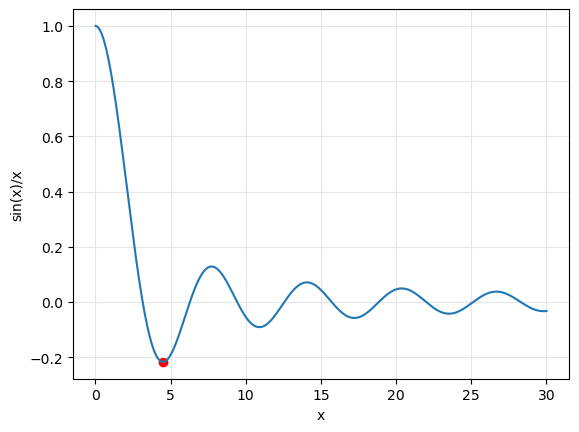

In [120]:
res = minimize_scalar(myObj, bounds=(0.01, 30))
print(res)
# plotting
x = np.arange(0.01, 30.01, 0.01)
y = np.sin(x)/x

plt.plot(x,y)
plt.scatter(res.x, res.fun, color='red')
plt.xlabel('x'); plt.ylabel('sin(x)/x'); plt.grid(True, color='.9')
plt.show()

### Maximizing

In [151]:
# to maximize, make it -1
myObjNew = lambda x: -1*myObj(x)
myObjNew(0.01)

-0.9999833334166665

     fun: -0.04902962401405628
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 20.371302105130404


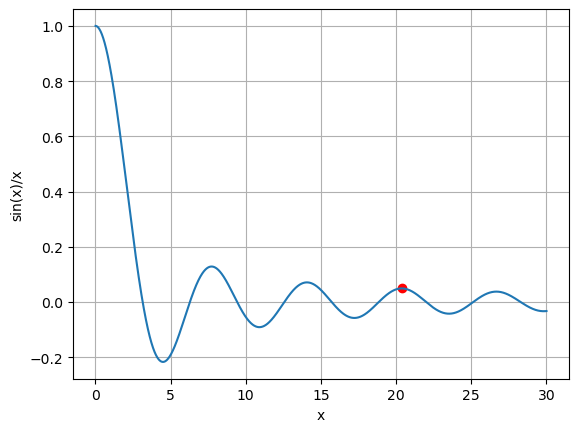

In [207]:
res = minimize_scalar(myObjNew, bounds=(0.01,30), method='Bounded')
print(res)

x = np.arange(0.01, 30.01, 0.01)
y = np.sin(x)/x

plt.plot(x,y)
plt.scatter(res.x, -1*res.fun, color='red')
plt.xlabel('x'); plt.ylabel('sin(x)/x'); plt.grid(True)
plt.show()

### Trying finding in sub-ranges

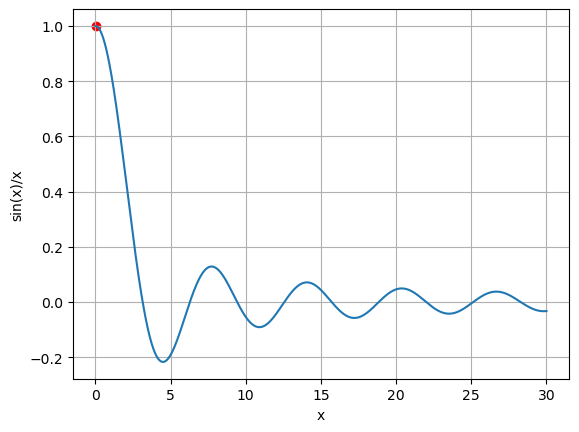

In [232]:
# try optimizing in different sub-ranges
n_ranges = 10
brackets = np.linspace(0.01,30,n_ranges)
results = []
for i in range(n_ranges-1):
    bounds = (brackets[i], brackets[i+1])
    res = minimize_scalar(myObjNew, bounds=bounds, method='Bounded')
    results.append((res.x, -res.fun))
    
x_max, y_max = max(results, key=lambda x:x[1])

plt.plot(x,y)
plt.scatter(x_max, y_max, color='red')
plt.xlabel('x'); plt.ylabel('sin(x)/x'); plt.grid(True)
plt.show()

### Using other algorithm which supports global optimization

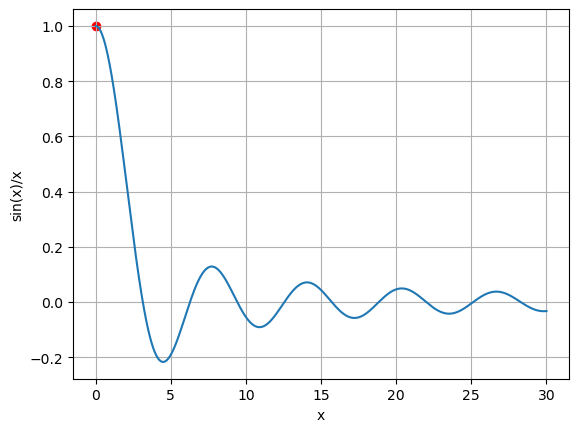

In [153]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "L-BFGS-B"}
res = basinhopping(myObjNew, 25, stepsize=5, minimizer_kwargs=minimizer_kwargs, niter=100)

plt.plot(x,y)
plt.scatter(res.x, -1*res.fun, color='red')
plt.xlabel('x'); plt.ylabel('sin(x)/x'); plt.grid(True)
plt.show()

## Peakload pricing example

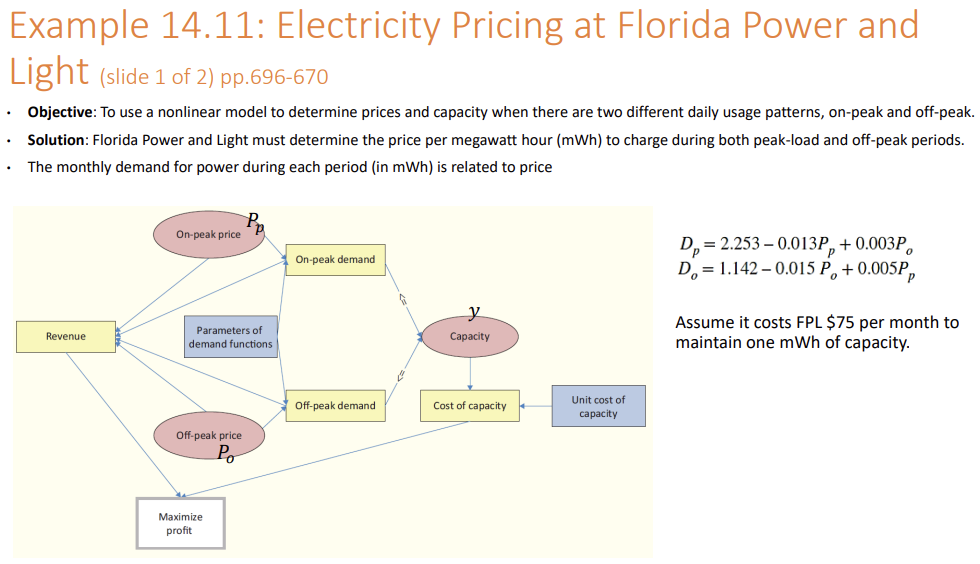

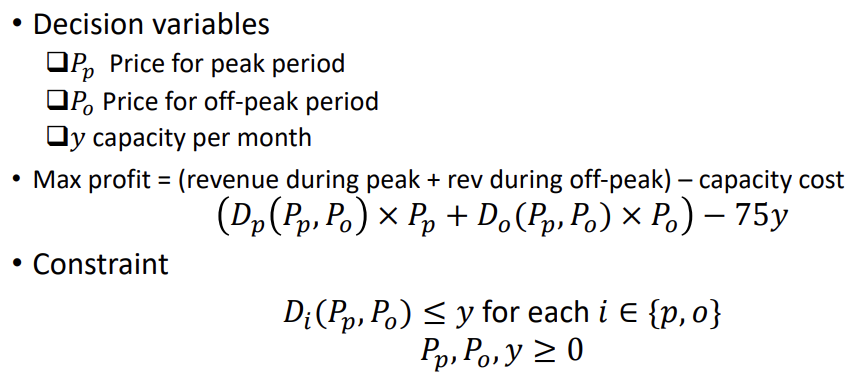

### scipy optimize

In [246]:
from scipy.optimize import minimize

In [265]:
# input param
a1 = 2.253
b1 = -0.013
c1 = 0.003
a2 = 1.142
b2 = -0.015
c2 = 0.005
capCost = 75

In [266]:
demand1 = lambda x: a1 + b1*x[0] + c1*x[1]
demand2 = lambda x: a2 + b2*x[1] + c2*x[0]

In [267]:
# test out demand1 fn
demand1((150,100))

0.6030000000000002

In [268]:
def profit(x):
    rev = demand1(x)*x[0] + demand2(x)*x[1]
    out = rev - capCost*x[2]
    return out

In [269]:
# test out profit fn
profit([150,100,0.5])

92.15000000000003

In [270]:
# maximize problem
myObj = lambda x: -1*profit(x)

In [271]:
cons = ({'type': 'ineq', 'fun': lambda x: x[2] - demand1(x)},
        {'type': 'ineq', 'fun': lambda x: x[2] - demand2(x)}
       )

bnds = ((0,None), (0,None), (0,None))

xInit = [100, 100, 0.5]

res = minimize(fun = myObj, x0 = xInit, bounds = bnds, constraints = cons)
res.x

array([137.57221315,  75.84999093,   0.6921112 ])

In [272]:
res

     fun: -95.80355802195729
     jac: array([7.17077255e-01, 3.29208374e-02, 7.50000000e+01])
 message: 'Optimization terminated successfully'
    nfev: 37
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([137.57221315,  75.84999093,   0.6921112 ])

## In-class exercise

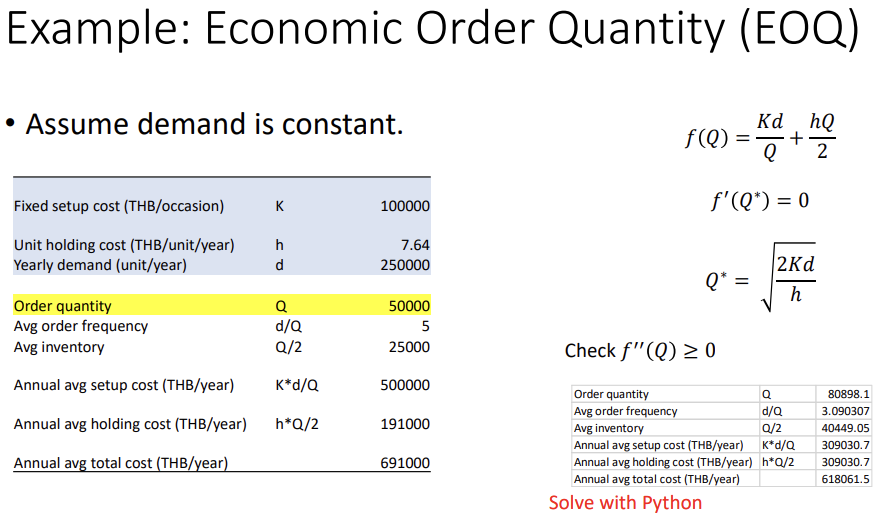

In [273]:
def myObj(x):
    return -1*(3*x[0] + 5*x[1])

cons = ({'type':'ineq', 'fun': lambda x: 216 - 9*x[0]**2 - 5*x[1]**2}
       )

bnds = ((0,4), (0,None))

res = minimize(fun=myObj, x0=[1,1], bounds=bnds, constraints=cons)
res.x

array([2.00000007, 5.99999996])

In [274]:
res

     fun: -36.00000000149615
     jac: array([-3., -5.])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([2.00000007, 5.99999996])

## In-class exercise 2

In [261]:
K = 100000
d = 250000
h = 7.64

myObj = lambda q: K*d/q + h*q/2
myObj(50000)

691000.0

In [262]:
# res = minimize_scalar(myObj, bounds=(1, 250000), method='Bounded')
res = minimize_scalar(myObj, bounds=(1, 250000), method='Bounded')
res.x

80898.10023532111

In [63]:
res

     fun: 618061.4856144977
 message: 'Solution found.'
    nfev: 13
  status: 0
 success: True
       x: 80898.10023532111

## Homework 5
Peakload pricing example modified - fixed capacity at 0.65

In [307]:
# input param
a1 = 2.253
b1 = -0.013
c1 = 0.003
a2 = 1.142
b2 = -0.015
c2 = 0.005
capCost = 75
capacity = 0.65

demand1 = lambda x: a1 + b1*x[0] + c1*x[1]
demand2 = lambda x: a2 + b2*x[1] + c2*x[0]

def profit(x):
    rev = demand1(x)*x[0] + demand2(x)*x[1]
    out = rev - capCost*capacity
    return out

objfunc = lambda x: -1*profit(x)

cons = ({'type': 'ineq', 'fun': lambda x: capacity - demand1(x)},
        {'type': 'ineq', 'fun': lambda x: capacity - demand2(x)}
       )
bnds = ((0,None), (0,None))
xInit = [100, 100]

res = minimize(fun=objfunc, x0=xInit, bounds = bnds, constraints = cons)
res

     fun: -95.44888888889034
     jac: array([0.7928772 , 0.12556648])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([141.78333333,  80.06111111])

In [308]:
print(f"Maximized profit: {-res.fun:>8.2f}")
print(f"Peak price:       {res.x[0]:>8.2f}")
print(f"Off-peak price:   {res.x[1]:>8.2f}")

Maximized profit:    95.45
Peak price:         141.78
Off-peak price:      80.06


## cvxopt

In [233]:
from cvxopt import matrix
from cvxopt import solvers

In [234]:
# input param
a1 = 2.253
b1 = -0.013
c1 = 0.003
a2 = 1.142
b2 = -0.015
c2 = 0.005
a3 = -75

In [235]:
P = matrix([
        [-2*b1, -(c1+c2), 0], 
        [-(c1+c2), -2*b2, 0],
        [0, 0, 0]]
)

In [236]:
q = matrix([-a1, -a2, -a3])

In [237]:
G = matrix([[b1, c2], [c1, b2], [-1, -1]])

In [238]:
h = matrix([-a1, -a2])

In [239]:
sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -2.9132e+03 -1.0058e+02  9e+01  2e+01  4e-16
 1: -3.3525e+02 -9.7799e+01  9e+00  2e+00  3e-15
 2: -9.4756e+01 -9.5883e+01  1e+00  3e-16  2e-14
 3: -9.5765e+01 -9.5804e+01  4e-02  6e-17  2e-18
 4: -9.5803e+01 -9.5804e+01  4e-04  9e-17  1e-15
 5: -9.5804e+01 -9.5804e+01  4e-06  1e-16  5e-15
Optimal solution found.


In [240]:
print(sol['x'])

[ 1.38e+02]
[ 7.59e+01]
[ 6.92e-01]



In [241]:
print(-1*sol['primal objective'])

95.80355407184692
